In [2]:
import cnn_model
import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


In [4]:

# 입력과 출력 지정하기 --- (*1)
im_rows = 32 # 이미지의 높이
im_cols = 32 # 이미지의 너비
im_color = 3 # 이미지의 색공간
in_shape = (im_rows, im_cols, im_color)
nb_classes = 3

# 사진 데이터 읽어 들이기 --- (*2)
photos = np.load('image/photos.npz')
x = photos['x']
y = photos['y']

# 읽어들인 데이터를 3차원 배열로 변환하기 --- (*3)
x = x.reshape(-1, im_rows, im_cols, im_color)
x = x.astype('float32') / 255
# 레이블 데이터를 One-hot 형식으로 변환하기 --- (*4)
y = keras.utils.np_utils.to_categorical(y.astype('int32'), nb_classes)

# 학습 전용과 테스트 전용으로 구분하기 --- (*5)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.8)

#CNN 모델 만들기 --- (*6)
model = cnn_model.get_model(in_shape, nb_classes)



In [10]:
# 학습 실행하기 --- (*7)
history = model.fit(x_train, y_train,
          batch_size=32,
          epochs=20,
          verbose=1,
          validation_data=(x_test, y_test))

# 모델 평가하기 --- (*8)
score = model.evaluate(x_test, y_test, verbose=1)
print('정답률=', score[1], 'loss=', score[0])


Epoch 1/20
8/8 [==============================] - 0s 40ms/step - loss: 0.7256 - accuracy: 0.7042 - val_loss: 0.9220 - val_accuracy: 0.5667
Epoch 2/20
8/8 [==============================] - 0s 39ms/step - loss: 0.6229 - accuracy: 0.7458 - val_loss: 0.9986 - val_accuracy: 0.5667
Epoch 3/20
8/8 [==============================] - 0s 40ms/step - loss: 0.6301 - accuracy: 0.7583 - val_loss: 1.1241 - val_accuracy: 0.4667
Epoch 4/20
8/8 [==============================] - 0s 40ms/step - loss: 0.6193 - accuracy: 0.7417 - val_loss: 1.1834 - val_accuracy: 0.5333
Epoch 5/20
8/8 [==============================] - 0s 39ms/step - loss: 0.6342 - accuracy: 0.7125 - val_loss: 2.3200 - val_accuracy: 0.4833
Epoch 6/20
8/8 [==============================] - 0s 39ms/step - loss: 0.7426 - accuracy: 0.7208 - val_loss: 1.3857 - val_accuracy: 0.5500
Epoch 7/20
8/8 [==============================] - 0s 39ms/step - loss: 0.5003 - accuracy: 0.7917 - val_loss: 1.4289 - val_accuracy: 0.5333
Epoch 8/20
8/8 [===========

In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

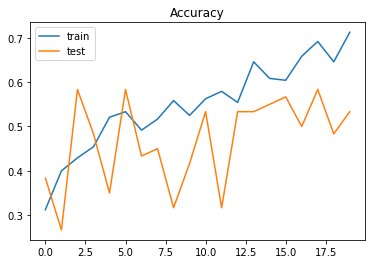

In [20]:

# 학습 상태를 그래프로 그리기 --- (*9)
# 정답률 추이를 그래프로 그리기
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


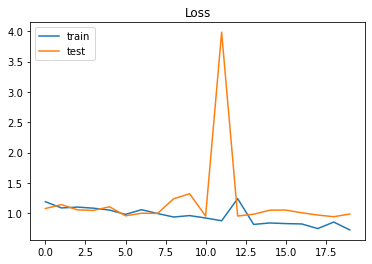

In [29]:
# 손실 추이를 그래프로 그리기
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [30]:
model.save_weights('./image/photos-model-light.hdf5')